In [1]:
# Claire Ardern 
# Intro to Machine Learning - Homework 1
# Linear Regression with Gradient Descent - with input normalization, input standardization, and parameters penalty
# 09/28/2022

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in data file.
df = pd.read_csv('./Housing.csv')

# Convert binary data to numerical representation.
df.mainroad.replace(('yes', 'no'), (1, 0), inplace=True)
df.guestroom.replace(('yes', 'no'), (1, 0), inplace=True)
df.basement.replace(('yes', 'no'), (1, 0), inplace=True)
df.hotwaterheating.replace(('yes', 'no'), (1, 0), inplace=True)
df.airconditioning.replace(('yes', 'no'), (1, 0), inplace=True)
df.prefarea.replace(('yes', 'no'), (1, 0), inplace=True)

# Divide provided data into Training Set (80%) and Validation Set (20%).
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_val = train_test_split(df, train_size =  0.8, test_size = 0.2)

In [4]:
# Loss Function

def compute_loss(X, Y, theta):
    
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2*m) * np.sum(sqrErrors)
    
    return J
    

In [5]:
# Gradient Descent Function

def gradient_descent(X, Y, theta, alpha, iterations, X_V, Y_V):
    
        loss_history = np.zeros(iterations)
        loss_history_V = np.zeros(iterations)
        
        for i in range(iterations): 
            
            predictions = X.dot(theta)
            errors = np.subtract(predictions, Y)
            sum_delta = (alpha / m) * X.transpose().dot(errors);
            theta = theta - sum_delta;
            loss_history[i] = compute_loss(X, Y, theta)
            loss_history_V[i] = compute_loss(X_V, Y_V, theta)
            
        return theta, loss_history, loss_history_V

In [6]:
######################
##### PROBLEM 1a #####
######################

# Create an array for each data set.
area = df_train.values[:,1]
bdr = df_train.values[:,2]
bth = df_train.values[:,3]
st = df_train.values[:,4]
p = df_train.values[:,10]
Y = df_train.values[:,0]

area_V = df_val.values[:,1]
bdr_V = df_val.values[:,2]
bth_V = df_val.values[:,3]
st_V = df_val.values[:,4]
p_V = df_val.values[:,10]
Y_V = df_val.values[:,0]
 
# Get length of data sets.
m = len(Y)
m_V = len(Y_V)

X_0 = np.ones((m,1))
X_0V = np.ones((m_V,1))

# Reshape arrays for 2D formatting.
area = area.reshape(m,1)
bdr = bdr.reshape(m,1)
bth = bth.reshape(m,1)
st = st.reshape(m,1)
p = p.reshape(m,1)

area_V = area_V.reshape(m_V,1)
bdr_V = bdr_V.reshape(m_V,1)
bth_V = bth_V.reshape(m_V,1)
st_V = st_V.reshape(m_V,1)
p_V = p_V.reshape(m_V,1)

# Stack horizontally
X = np.hstack((X_0, area, bdr, bth, st, p))

X_V = np.hstack((X_0V, area_V, bdr_V, bth_V, st_V, p_V))

# Initialize theta to zeros.
theta = np.zeros(6)

Final values of theta for dataset:  [0.05830589459269215 321.0793672591885 0.18019481684073071
 0.08120208631487572 0.11563035421100236 0.049490690175024644]
The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 6239009456415.915
The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 6239009456415.915


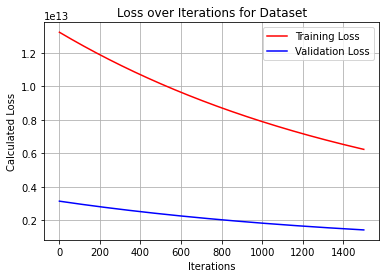

In [7]:
# (1a) Calculations on Training and Validation Sets

iterations = 1500
alpha = 0.00000000001

theta, loss_history, loss_history_V = gradient_descent(X, Y, theta, alpha, iterations, X_V, Y_V)
print('Final values of theta for dataset: ', theta)

loss = compute_loss(X, Y, theta)
print('The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

loss_V = compute_loss(X_V, Y_V, theta)
print('The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

plt.figure()
plt.plot(range(1, iterations+1), loss_history, color = 'red', label = "Training Loss")
plt.plot(range(1, iterations+1), loss_history_V, color = 'blue', label = "Validation Loss")
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Calculated Loss')
plt.title('Loss over Iterations for Dataset')
plt.legend()


In [8]:
######################
##### PROBLEM 1b #####
######################

# Create an array for each data set.
area = df_train.values[:,1]
bdr = df_train.values[:,2]
bth = df_train.values[:,3]
st = df_train.values[:,4]
main = df_train.values[:,5]
gst = df_train.values[:,6]
bmt = df_train.values[:,7]
hotw = df_train.values[:,8]
ac = df_train.values[:,9]
p = df_train.values[:,10]
pref = df_train.values[:,11]
Y = df_train.values[:,0]

area_V = df_val.values[:,1]
bdr_V = df_val.values[:,2]
bth_V = df_val.values[:,3]
st_V = df_val.values[:,4]
main_V = df_val.values[:,5]
gst_V = df_val.values[:,6]
bmt_V = df_val.values[:,7]
hotw_V = df_val.values[:,8]
ac_V = df_val.values[:,9]
p_V = df_val.values[:,10]
pref_V = df_val.values[:,11]
Y_V = df_val.values[:,0]  
    
# Get length of data sets.
m = len(Y)
m_V = len(Y_V)

X_0 = np.ones((m,1))
X_0V = np.ones((m_V,1))

# Reshape arrays for 2D formatting.
area = area.reshape(m,1)
bdr = bdr.reshape(m,1)
bth = bth.reshape(m,1)
st = st.reshape(m,1)
main = main.reshape(m,1)
gst = gst.reshape(m,1)
bmt = bmt.reshape(m,1)
hotw = hotw.reshape(m,1)
ac = ac.reshape(m,1)
p = p.reshape(m,1)
pref = pref.reshape(m,1)

area_V = area_V.reshape(m_V,1)
bdr_V = bdr_V.reshape(m_V,1)
bth_V = bth_V.reshape(m_V,1)
st_V = st_V.reshape(m_V,1)
main_V = main_V.reshape(m_V,1)
gst_V = gst_V.reshape(m_V,1)
bmt_V = bmt_V.reshape(m_V,1)
hotw_V = hotw_V.reshape(m_V,1)
ac_V = ac_V.reshape(m_V,1)
p_V = p_V.reshape(m_V,1)
pref_V = pref_V.reshape(m_V,1)

# Stack horizontally
X = np.hstack((X_0, area, bdr, bth, st, main, gst, bmt, hotw, ac, p, pref))

X_V = np.hstack((X_0V, area_V, bdr_V, bth_V, st_V, main_V, gst_V, bmt_V, hotw_V, ac_V, p_V, pref_V))

# Initialize theta to zeros.
theta = np.zeros(12)

Final values of theta for dataset:  [0.05830589412275003 321.0793647104753 0.18019481542361263
 0.0812020856943636 0.11563035332692483 0.05267799361038154
 0.013073520997504553 0.022023782050397678 0.002984915004057907
 0.024169811389566937 0.04949068979227739 0.018214563833992208]
The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 6239009263885.528
The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 6239009263885.528


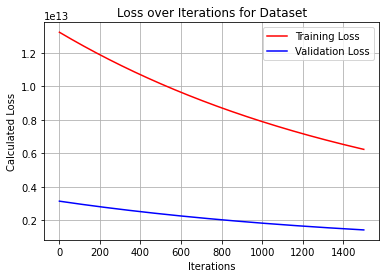

In [9]:
# (1b) Calculations on Training and Validation Sets

iterations = 1500
alpha = 0.00000000001

theta, loss_history, loss_history_V = gradient_descent(X, Y, theta, alpha, iterations, X_V, Y_V)
print('Final values of theta for dataset: ', theta)

loss = compute_loss(X, Y, theta)
print('The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

loss_V = compute_loss(X_V, Y_V, theta)
print('The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

plt.figure()
plt.plot(range(1, iterations+1), loss_history, color = 'red', label = "Training Loss")
plt.plot(range(1, iterations+1), loss_history_V, color = 'blue', label = "Validation Loss")
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Calculated Loss')
plt.title('Loss over Iterations for Dataset')
plt.legend()

In [10]:
######################
##### PROBLEM 2a #####
######################

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
N_Scaler = MinMaxScaler()
S_Scaler = StandardScaler()

num_vars = ['area','bedrooms','bathrooms','stories','parking','price']
df_train_new = df_train[num_vars]
df_val_new = df_val[num_vars]

# (2a) For Input Normalization

df_train_new[num_vars] = N_Scaler.fit_transform(df_train_new[num_vars])
df_val_new[num_vars] = N_Scaler.fit_transform(df_val_new[num_vars])

# Create an array for each data set.
area = df_train_new.values[:,0]
bdr = df_train_new.values[:,1]
bth = df_train_new.values[:,2]
st = df_train_new.values[:,3]
p = df_train_new.values[:,4]
Y = df_train_new.values[:,5]

area_V = df_val_new.values[:,0]
bdr_V = df_val_new.values[:,1]
bth_V = df_val_new.values[:,2]
st_V = df_val_new.values[:,3]
p_V = df_val_new.values[:,4]
Y_V = df_val_new.values[:,5]

# Get length of data sets.
m = len(Y)
m_V = len(Y_V)

X_0 = np.ones((m,1))
X_0V = np.ones((m_V,1))

# Reshape arrays for 2D formatting.
area = area.reshape(m,1)
bdr = bdr.reshape(m,1)
bth = bth.reshape(m,1)
st = st.reshape(m,1)
p = p.reshape(m,1)

area_V = area_V.reshape(m_V,1)
bdr_V = bdr_V.reshape(m_V,1)
bth_V = bth_V.reshape(m_V,1)
st_V = st_V.reshape(m_V,1)
p_V = p_V.reshape(m_V,1)

# Stack horizontally
X = np.hstack((X_0, area, bdr, bth, st, p))

X_V = np.hstack((X_0V, area_V, bdr_V, bth_V, st_V, p_V))

# Initialize theta to zeros.
theta = np.zeros(6)

Final values of theta for dataset:  [0.03669848 0.42769442 0.09924226 0.20628218 0.13664188 0.09161803]
The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.006094514777945519
The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.006094514777945519


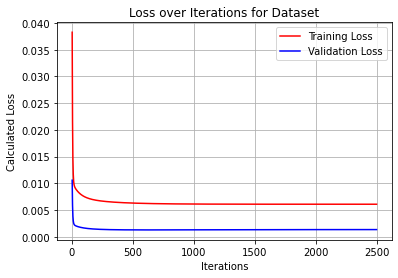

In [11]:
# (2a) Calculations on Training and Validation Sets with Input Normalization

iterations = 2500
alpha = 0.1

theta, loss_history, loss_history_V = gradient_descent(X, Y, theta, alpha, iterations, X_V, Y_V)
print('Final values of theta for dataset: ', theta)

loss = compute_loss(X, Y, theta)
print('The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

loss_V = compute_loss(X_V, Y_V, theta)
print('The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

plt.figure()
plt.plot(range(1, iterations+1), loss_history, color = 'red', label = "Training Loss")
plt.plot(range(1, iterations+1), loss_history_V, color = 'blue', label = "Validation Loss")
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Calculated Loss')
plt.title('Loss over Iterations for Dataset')
plt.legend()


In [12]:
# (2a) For Input Standardization

df_train_new[num_vars] = S_Scaler.fit_transform(df_train_new[num_vars])
df_val_new[num_vars] = S_Scaler.fit_transform(df_val_new[num_vars])

# Create an array for each data set.
area = df_train_new.values[:,0]
bdr = df_train_new.values[:,1]
bth = df_train_new.values[:,2]
st = df_train_new.values[:,3]
p = df_train_new.values[:,4]
Y = df_train_new.values[:,5]

area_V = df_val_new.values[:,0]
bdr_V = df_val_new.values[:,1]
bth_V = df_val_new.values[:,2]
st_V = df_val_new.values[:,3]
p_V = df_val_new.values[:,4]
Y_V = df_val_new.values[:,5]

# Get length of data sets.
m = len(Y)
m_V = len(Y_V)

X_0 = np.ones((m,1))
X_0V = np.ones((m_V,1))

# Reshape arrays for 2D formatting.
area = area.reshape(m,1)
bdr = bdr.reshape(m,1)
bth = bth.reshape(m,1)
st = st.reshape(m,1)
p = p.reshape(m,1)

area_V = area_V.reshape(m_V,1)
bdr_V = bdr_V.reshape(m_V,1)
bth_V = bth_V.reshape(m_V,1)
st_V = st_V.reshape(m_V,1)
p_V = p_V.reshape(m_V,1)

# Stack horizontally
X = np.hstack((X_0, area, bdr, bth, st, p))

X_V = np.hstack((X_0V, area_V, bdr_V, bth_V, st_V, p_V))

# Initialize theta to zeros.
theta = np.zeros(6)

Final values of theta for dataset:  [3.14478311e-16 3.88481823e-01 8.90638389e-02 3.04158794e-01
 2.40439813e-01 1.60108157e-01]
The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.2230963235268556
The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.2230963235268556


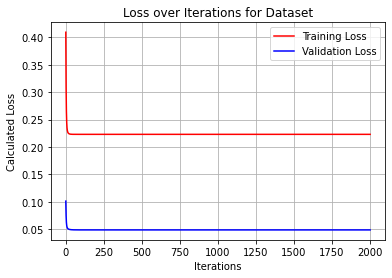

In [13]:
# (2a) Calculations on Training and Validation Sets with Input Standardization

iterations = 2000
alpha = 0.1

theta, loss_history, loss_history_V = gradient_descent(X, Y, theta, alpha, iterations, X_V, Y_V)
print('Final values of theta for dataset: ', theta)

loss = compute_loss(X, Y, theta)
print('The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

loss_V = compute_loss(X_V, Y_V, theta)
print('The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

plt.figure()
plt.plot(range(1, iterations+1), loss_history, color = 'red', label = "Training Loss")
plt.plot(range(1, iterations+1), loss_history_V, color = 'blue', label = "Validation Loss")
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Calculated Loss')
plt.title('Loss over Iterations for Dataset')
plt.legend()


In [14]:
######################
##### PROBLEM 2b #####
######################

num_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','price']
df_train_new = df_train[num_vars]
df_val_new = df_val[num_vars]

# (2b) For Input Normalization

df_train_new[num_vars] = N_Scaler.fit_transform(df_train_new[num_vars])
df_val_new[num_vars] = N_Scaler.fit_transform(df_val_new[num_vars])

# Create an array for each data set.
area = df_train_new.values[:,0]
bdr = df_train_new.values[:,1]
bth = df_train_new.values[:,2]
st = df_train_new.values[:,3]
main = df_train_new.values[:,4]
gst = df_train_new.values[:,5]
bmt = df_train_new.values[:,6]
hotw = df_train_new.values[:,7]
ac = df_train_new.values[:,8]
p = df_train_new.values[:,9]
pref = df_train_new.values[:,10]
Y = df_train_new.values[:,11]

area_V = df_val_new.values[:,0]
bdr_V = df_val_new.values[:,1]
bth_V = df_val_new.values[:,2]
st_V = df_val_new.values[:,3]
main_V = df_val_new.values[:,4]
gst_V = df_val_new.values[:,5]
bmt_V = df_val_new.values[:,6]
hotw_V = df_val_new.values[:,7]
ac_V = df_val_new.values[:,8]
p_V = df_val_new.values[:,9]
pref_V = df_val_new.values[:,10]
Y_V = df_val_new.values[:,11]  
    
# Get length of data sets.
m = len(Y)
m_V = len(Y_V)

X_0 = np.ones((m,1))
X_0V = np.ones((m_V,1))

# Reshape arrays for 2D formatting.
area = area.reshape(m,1)
bdr = bdr.reshape(m,1)
bth = bth.reshape(m,1)
st = st.reshape(m,1)
main = main.reshape(m,1)
gst = gst.reshape(m,1)
bmt = bmt.reshape(m,1)
hotw = hotw.reshape(m,1)
ac = ac.reshape(m,1)
p = p.reshape(m,1)
pref = pref.reshape(m,1)

area_V = area_V.reshape(m_V,1)
bdr_V = bdr_V.reshape(m_V,1)
bth_V = bth_V.reshape(m_V,1)
st_V = st_V.reshape(m_V,1)
main_V = main_V.reshape(m_V,1)
gst_V = gst_V.reshape(m_V,1)
bmt_V = bmt_V.reshape(m_V,1)
hotw_V = hotw_V.reshape(m_V,1)
ac_V = ac_V.reshape(m_V,1)
p_V = p_V.reshape(m_V,1)
pref_V = pref_V.reshape(m_V,1)

# Stack horizontally
X = np.hstack((X_0, area, bdr, bth, st, main, gst, bmt, hotw, ac, p, pref))

X_V = np.hstack((X_0V, area_V, bdr_V, bth_V, st_V, main_V, gst_V, bmt_V, hotw_V, ac_V, p_V, pref_V))

# Initialize theta to zeros.
theta = np.zeros(12)

Final values of theta for dataset:  [-0.00209156  0.2927237   0.06657624  0.17782484  0.11216514  0.0432791
  0.03911179  0.02952755  0.10597747  0.07865351  0.06742557  0.06355495]
The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.00448997491504074
The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.00448997491504074


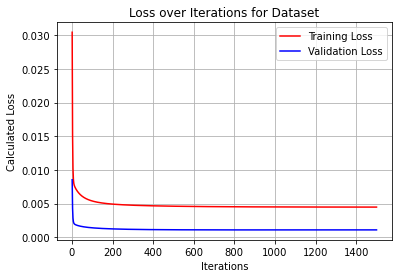

In [15]:
# (2b) Calculations on Training and Validation Sets with Input Normalization

iterations = 1500
alpha = 0.1

theta, loss_history, loss_history_V = gradient_descent(X, Y, theta, alpha, iterations, X_V, Y_V)
print('Final values of theta for dataset: ', theta)

loss = compute_loss(X, Y, theta)
print('The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

loss_V = compute_loss(X_V, Y_V, theta)
print('The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

plt.figure()
plt.plot(range(1, iterations+1), loss_history, color = 'red', label = "Training Loss")
plt.plot(range(1, iterations+1), loss_history_V, color = 'blue', label = "Validation Loss")
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Calculated Loss')
plt.title('Loss over Iterations for Dataset')
plt.legend()

In [16]:
# (2b) For Input Standardization

df_train_new[num_vars] = S_Scaler.fit_transform(df_train_new[num_vars])
df_val_new[num_vars] = S_Scaler.fit_transform(df_val_new[num_vars])

# Create an array for each data set.
area = df_train_new.values[:,0]
bdr = df_train_new.values[:,1]
bth = df_train_new.values[:,2]
st = df_train_new.values[:,3]
main = df_train_new.values[:,4]
gst = df_train_new.values[:,5]
bmt = df_train_new.values[:,6]
hotw = df_train_new.values[:,7]
ac = df_train_new.values[:,8]
p = df_train_new.values[:,9]
pref = df_train_new.values[:,10]
Y = df_train_new.values[:,11]

area_V = df_val_new.values[:,0]
bdr_V = df_val_new.values[:,1]
bth_V = df_val_new.values[:,2]
st_V = df_val_new.values[:,3]
main_V = df_val_new.values[:,4]
gst_V = df_val_new.values[:,5]
bmt_V = df_val_new.values[:,6]
hotw_V = df_val_new.values[:,7]
ac_V = df_val_new.values[:,8]
p_V = df_val_new.values[:,9]
pref_V = df_val_new.values[:,10]
Y_V = df_val_new.values[:,11]  
    
# Get length of data sets.
m = len(Y)
m_V = len(Y_V)

X_0 = np.ones((m,1))
X_0V = np.ones((m_V,1))

# Reshape arrays for 2D formatting.
area = area.reshape(m,1)
bdr = bdr.reshape(m,1)
bth = bth.reshape(m,1)
st = st.reshape(m,1)
main = main.reshape(m,1)
gst = gst.reshape(m,1)
bmt = bmt.reshape(m,1)
hotw = hotw.reshape(m,1)
ac = ac.reshape(m,1)
p = p.reshape(m,1)
pref = pref.reshape(m,1)

area_V = area_V.reshape(m_V,1)
bdr_V = bdr_V.reshape(m_V,1)
bth_V = bth_V.reshape(m_V,1)
st_V = st_V.reshape(m_V,1)
main_V = main_V.reshape(m_V,1)
gst_V = gst_V.reshape(m_V,1)
bmt_V = bmt_V.reshape(m_V,1)
hotw_V = hotw_V.reshape(m_V,1)
ac_V = ac_V.reshape(m_V,1)
p_V = p_V.reshape(m_V,1)
pref_V = pref_V.reshape(m_V,1)

# Stack horizontally
X = np.hstack((X_0, area, bdr, bth, st, main, gst, bmt, hotw, ac, p, pref))

X_V = np.hstack((X_0V, area_V, bdr_V, bth_V, st_V, main_V, gst_V, bmt_V, hotw_V, ac_V, p_V, pref_V))

# Initialize theta to zeros.
theta = np.zeros(12)

Final values of theta for dataset:  [2.91509935e-16 2.86802300e-01 5.66977841e-02 2.60175343e-01
 2.00694996e-01 8.59288751e-02 8.77004231e-02 8.75035985e-02
 1.26523800e-01 2.19592259e-01 1.11768608e-01 1.60270222e-01]
The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.16415712662209136
The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.16415712662209136


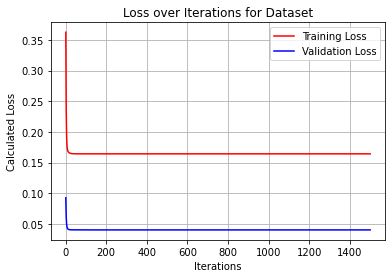

In [17]:
# (2b) Calculations on Training and Validation Sets with Input Standardization

iterations = 1500
alpha = 0.1

theta, loss_history, loss_history_V = gradient_descent(X, Y, theta, alpha, iterations, X_V, Y_V)
print('Final values of theta for dataset: ', theta)

loss = compute_loss(X, Y, theta)
print('The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

loss_V = compute_loss(X_V, Y_V, theta)
print('The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

plt.figure()
plt.plot(range(1, iterations+1), loss_history, color = 'red', label = "Training Loss")
plt.plot(range(1, iterations+1), loss_history_V, color = 'blue', label = "Validation Loss")
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Calculated Loss')
plt.title('Loss over Iterations for Dataset')
plt.legend()


In [18]:
######################
##### PROBLEM 3a #####
######################

# New Loss Function with Parameters Penalty

def compute_loss_PP(X, Y, theta, lambda_val):
    
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    sqrTheta = np.square(theta)
    J = (1 / (2*m) * (np.sum(sqrErrors) + lambda_val * np.sum(sqrTheta)))
    
    return J

# New Gradient Descent Function with Parameters Penalty

def gradient_descent_PP(X, Y, theta, alpha, iterations, X_V, Y_V, lambda_val):
    
        loss_history = np.zeros(iterations)
        loss_history_V = np.zeros(iterations)
        
        for i in range(iterations): 
            
            predictions = X.dot(theta)
            errors = np.subtract(predictions, Y)
            sum_delta = alpha * ((1 / m) * (X.transpose().dot(errors) + np.multiply(lambda_val,(1/m)) + theta));
            theta = theta - sum_delta;
            loss_history[i] = compute_loss_PP(X, Y, theta, lambda_val)
            loss_history_V[i] = compute_loss(X_V, Y_V, theta)
            
        return theta, loss_history, loss_history_V
    

In [19]:
# (3a) For Input Normalization

df_train_new[num_vars] = N_Scaler.fit_transform(df_train_new[num_vars])
df_val_new[num_vars] = N_Scaler.fit_transform(df_val_new[num_vars])

# Create an array for each data set.
area = df_train_new.values[:,0]
bdr = df_train_new.values[:,1]
bth = df_train_new.values[:,2]
st = df_train_new.values[:,3]
p = df_train_new.values[:,4]
Y = df_train_new.values[:,5]

area_V = df_val_new.values[:,0]
bdr_V = df_val_new.values[:,1]
bth_V = df_val_new.values[:,2]
st_V = df_val_new.values[:,3]
p_V = df_val_new.values[:,4]
Y_V = df_val_new.values[:,5]

# Get length of data sets.
m = len(Y)
m_V = len(Y_V)

X_0 = np.ones((m,1))
X_0V = np.ones((m_V,1))

# Reshape arrays for 2D formatting.
area = area.reshape(m,1)
bdr = bdr.reshape(m,1)
bth = bth.reshape(m,1)
st = st.reshape(m,1)
p = p.reshape(m,1)

area_V = area_V.reshape(m_V,1)
bdr_V = bdr_V.reshape(m_V,1)
bth_V = bth_V.reshape(m_V,1)
st_V = st_V.reshape(m_V,1)
p_V = p_V.reshape(m_V,1)

# Stack horizontally
X = np.hstack((X_0, area, bdr, bth, st, p))

X_V = np.hstack((X_0V, area_V, bdr_V, bth_V, st_V, p_V))

# Initialize theta to zeros.
theta = np.zeros(6)

Final values of theta for dataset:  [-0.00316723  0.25331319  0.09739069  0.1395661   0.01445204  0.0690359 ]
The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.07010625520856566
The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.07010625520856566


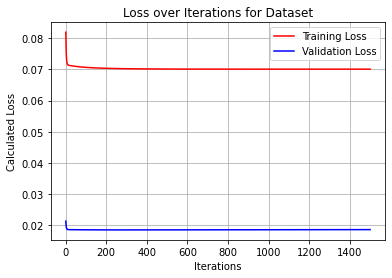

In [20]:
# (3a) Calculations on Training and Validation Sets with Input Normalization and Parameters Penalty

iterations = 1500
alpha = 0.1
lambda_val = 2

theta, loss_history, loss_history_V = gradient_descent_PP(X, Y, theta, alpha, iterations, X_V, Y_V, lambda_val)
print('Final values of theta for dataset: ', theta)

loss = compute_loss_PP(X, Y, theta, lambda_val)
print('The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

loss_V = compute_loss(X_V, Y_V, theta)
print('The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

plt.figure()
plt.plot(range(1, iterations+1), loss_history, color = 'red', label = "Training Loss")
plt.plot(range(1, iterations+1), loss_history_V, color = 'blue', label = "Validation Loss")
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Calculated Loss')
plt.title('Loss over Iterations for Dataset')
plt.legend()


In [21]:
# (3a) For Input Standardization

df_train_new[num_vars] = S_Scaler.fit_transform(df_train_new[num_vars])
df_val_new[num_vars] = S_Scaler.fit_transform(df_val_new[num_vars])

# Create an array for each data set.
area = df_train_new.values[:,0]
bdr = df_train_new.values[:,1]
bth = df_train_new.values[:,2]
st = df_train_new.values[:,3]
p = df_train_new.values[:,4]
Y = df_train_new.values[:,5]

area_V = df_val_new.values[:,0]
bdr_V = df_val_new.values[:,1]
bth_V = df_val_new.values[:,2]
st_V = df_val_new.values[:,3]
p_V = df_val_new.values[:,4]
Y_V = df_val_new.values[:,5]

# Get length of data sets.
m = len(Y)
m_V = len(Y_V)

X_0 = np.ones((m,1))
X_0V = np.ones((m_V,1))

# Reshape arrays for 2D formatting.
area = area.reshape(m,1)
bdr = bdr.reshape(m,1)
bth = bth.reshape(m,1)
st = st.reshape(m,1)
p = p.reshape(m,1)

area_V = area_V.reshape(m_V,1)
bdr_V = bdr_V.reshape(m_V,1)
bth_V = bth_V.reshape(m_V,1)
st_V = st_V.reshape(m_V,1)
p_V = p_V.reshape(m_V,1)

# Stack horizontally
X = np.hstack((X_0, area, bdr, bth, st, p))

X_V = np.hstack((X_0V, area_V, bdr_V, bth_V, st_V, p_V))

# Initialize theta to zeros.
theta = np.zeros(6)

Final values of theta for dataset:  [-1.04969244e-05  1.12528701e-01  4.17944371e-02  8.92580472e-02
  8.87788684e-03  5.97233790e-02]
The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.48051566261275547
The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.48051566261275547


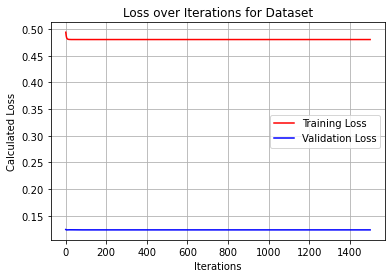

In [22]:
# (3a) Calculations on Training and Validation Sets with Input Standardization and Parameters Penalty

iterations = 1500
alpha = 0.1
lambda_val = 2

theta, loss_history, loss_history_V = gradient_descent_PP(X, Y, theta, alpha, iterations, X_V, Y_V, lambda_val)
print('Final values of theta for dataset: ', theta)

loss = compute_loss_PP(X, Y, theta, lambda_val)
print('The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

loss_V = compute_loss(X_V, Y_V, theta)
print('The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

plt.figure()
plt.plot(range(1, iterations+1), loss_history, color = 'red', label = "Training Loss")
plt.plot(range(1, iterations+1), loss_history_V, color = 'blue', label = "Validation Loss")
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Calculated Loss')
plt.title('Loss over Iterations for Dataset')
plt.legend()


In [23]:
######################
##### PROBLEM 3b #####
######################

# (3b) For Input Normalization

df_train_new[num_vars] = N_Scaler.fit_transform(df_train_new[num_vars])
df_val_new[num_vars] = N_Scaler.fit_transform(df_val_new[num_vars])

# Create an array for each data set.
area = df_train_new.values[:,0]
bdr = df_train_new.values[:,1]
bth = df_train_new.values[:,2]
st = df_train_new.values[:,3]
main = df_train_new.values[:,4]
gst = df_train_new.values[:,5]
bmt = df_train_new.values[:,6]
hotw = df_train_new.values[:,7]
ac = df_train_new.values[:,8]
p = df_train_new.values[:,9]
pref = df_train_new.values[:,10]
Y = df_train_new.values[:,11]

area_V = df_val_new.values[:,0]
bdr_V = df_val_new.values[:,1]
bth_V = df_val_new.values[:,2]
st_V = df_val_new.values[:,3]
main_V = df_val_new.values[:,4]
gst_V = df_val_new.values[:,5]
bmt_V = df_val_new.values[:,6]
hotw_V = df_val_new.values[:,7]
ac_V = df_val_new.values[:,8]
p_V = df_val_new.values[:,9]
pref_V = df_val_new.values[:,10]
Y_V = df_val_new.values[:,11]  
    
# Get length of data sets.
m = len(Y)
m_V = len(Y_V)

X_0 = np.ones((m,1))
X_0V = np.ones((m_V,1))

# Reshape arrays for 2D formatting.
area = area.reshape(m,1)
bdr = bdr.reshape(m,1)
bth = bth.reshape(m,1)
st = st.reshape(m,1)
main = main.reshape(m,1)
gst = gst.reshape(m,1)
bmt = bmt.reshape(m,1)
hotw = hotw.reshape(m,1)
ac = ac.reshape(m,1)
p = p.reshape(m,1)
pref = pref.reshape(m,1)

area_V = area_V.reshape(m_V,1)
bdr_V = bdr_V.reshape(m_V,1)
bth_V = bth_V.reshape(m_V,1)
st_V = st_V.reshape(m_V,1)
main_V = main_V.reshape(m_V,1)
gst_V = gst_V.reshape(m_V,1)
bmt_V = bmt_V.reshape(m_V,1)
hotw_V = hotw_V.reshape(m_V,1)
ac_V = ac_V.reshape(m_V,1)
p_V = p_V.reshape(m_V,1)
pref_V = pref_V.reshape(m_V,1)

# Stack horizontally
X = np.hstack((X_0, area, bdr, bth, st, main, gst, bmt, hotw, ac, p, pref))

X_V = np.hstack((X_0V, area_V, bdr_V, bth_V, st_V, main_V, gst_V, bmt_V, hotw_V, ac_V, p_V, pref_V))

# Initialize theta to zeros.
theta = np.zeros(12)

Final values of theta for dataset:  [0.00269185 0.26690084 0.0663636  0.17354304 0.11053832 0.0447566
 0.03987871 0.02903199 0.09993022 0.07948018 0.07019355 0.06490159]
The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.004847925820536109
The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.004847925820536109


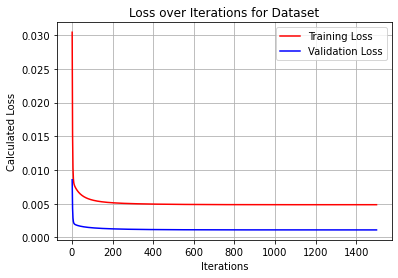

In [24]:
# (3b) Calculations on Training and Validation Sets with Input Normalization and Parameters Penalty

iterations = 1500
alpha = 0.1
lambda_val = 2

theta, loss_history, loss_history_V = gradient_descent_PP(X, Y, theta, alpha, iterations, X_V, Y_V, lambda_val)
print('Final values of theta for dataset: ', theta)

loss = compute_loss_PP(X, Y, theta, lambda_val)
print('The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

loss_V = compute_loss(X_V, Y_V, theta)
print('The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

plt.figure()
plt.plot(range(1, iterations+1), loss_history, color = 'red', label = "Training Loss")
plt.plot(range(1, iterations+1), loss_history_V, color = 'blue', label = "Validation Loss")
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Calculated Loss')
plt.title('Loss over Iterations for Dataset')
plt.legend()

In [25]:
# (3b) For Input Standardization

df_train_new[num_vars] = S_Scaler.fit_transform(df_train_new[num_vars])
df_val_new[num_vars] = S_Scaler.fit_transform(df_val_new[num_vars])

# Create an array for each data set.
area = df_train_new.values[:,0]
bdr = df_train_new.values[:,1]
bth = df_train_new.values[:,2]
st = df_train_new.values[:,3]
main = df_train_new.values[:,4]
gst = df_train_new.values[:,5]
bmt = df_train_new.values[:,6]
hotw = df_train_new.values[:,7]
ac = df_train_new.values[:,8]
p = df_train_new.values[:,9]
pref = df_train_new.values[:,10]
Y = df_train_new.values[:,11]

area_V = df_val_new.values[:,0]
bdr_V = df_val_new.values[:,1]
bth_V = df_val_new.values[:,2]
st_V = df_val_new.values[:,3]
main_V = df_val_new.values[:,4]
gst_V = df_val_new.values[:,5]
bmt_V = df_val_new.values[:,6]
hotw_V = df_val_new.values[:,7]
ac_V = df_val_new.values[:,8]
p_V = df_val_new.values[:,9]
pref_V = df_val_new.values[:,10]
Y_V = df_val_new.values[:,11]  
    
# Get length of data sets.
m = len(Y)
m_V = len(Y_V)

X_0 = np.ones((m,1))
X_0V = np.ones((m_V,1))

# Reshape arrays for 2D formatting.
area = area.reshape(m,1)
bdr = bdr.reshape(m,1)
bth = bth.reshape(m,1)
st = st.reshape(m,1)
main = main.reshape(m,1)
gst = gst.reshape(m,1)
bmt = bmt.reshape(m,1)
hotw = hotw.reshape(m,1)
ac = ac.reshape(m,1)
p = p.reshape(m,1)
pref = pref.reshape(m,1)

area_V = area_V.reshape(m_V,1)
bdr_V = bdr_V.reshape(m_V,1)
bth_V = bth_V.reshape(m_V,1)
st_V = st_V.reshape(m_V,1)
main_V = main_V.reshape(m_V,1)
gst_V = gst_V.reshape(m_V,1)
bmt_V = bmt_V.reshape(m_V,1)
hotw_V = hotw_V.reshape(m_V,1)
ac_V = ac_V.reshape(m_V,1)
p_V = p_V.reshape(m_V,1)
pref_V = pref_V.reshape(m_V,1)

# Stack horizontally
X = np.hstack((X_0, area, bdr, bth, st, main, gst, bmt, hotw, ac, p, pref))

X_V = np.hstack((X_0V, area_V, bdr_V, bth_V, st_V, main_V, gst_V, bmt_V, hotw_V, ac_V, p_V, pref_V))

# Initialize theta to zeros.
theta = np.zeros(12)

Final values of theta for dataset:  [-1.04969244e-05  2.86256845e-01  5.70678168e-02  2.59756957e-01
  2.00311127e-01  8.59661042e-02  8.77293977e-02  8.73294261e-02
  1.26164036e-01  2.19278851e-01  1.11844903e-01  1.60117997e-01]
The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.16488623869327512
The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking: 0.16488623869327512


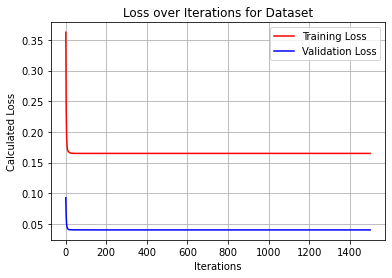

In [26]:
# (3b) Calculations on Training and Validation Sets with Input Standardization and Parameters Penalty

iterations = 1500
alpha = 0.1
lambda_val = 2

theta, loss_history, loss_history_V = gradient_descent_PP(X, Y, theta, alpha, iterations, X_V, Y_V, lambda_val)
print('Final values of theta for dataset: ', theta)

loss = compute_loss_PP(X, Y, theta, lambda_val)
print('The training loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

loss_V = compute_loss(X_V, Y_V, theta)
print('The validation loss for final values of theta using data for area, bedrooms, bathrooms, stories, parking:', loss)

plt.figure()
plt.plot(range(1, iterations+1), loss_history, color = 'red', label = "Training Loss")
plt.plot(range(1, iterations+1), loss_history_V, color = 'blue', label = "Validation Loss")
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Calculated Loss')
plt.title('Loss over Iterations for Dataset')
plt.legend()
